In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


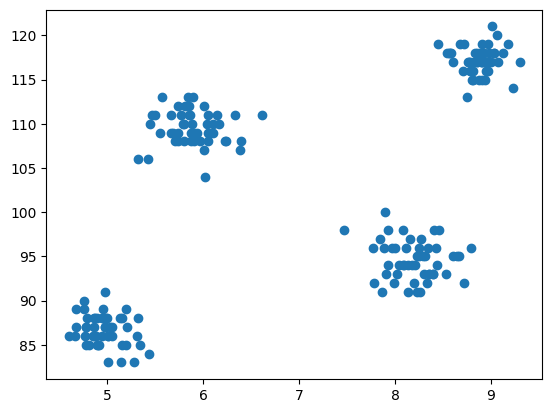

In [3]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [4]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

In [5]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 582.7491892238328,
 446.7996165765536,
 353.38640348327465,
 284.57508106510437,
 203.38836189856835,
 184.93077855903326]

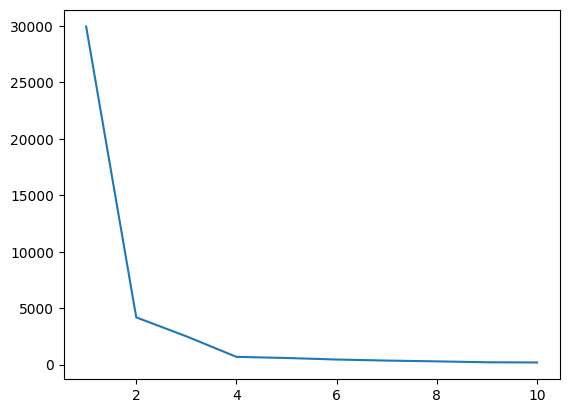

In [6]:
plt.plot(range(1,11), wcss)

In [7]:
km = KMeans(n_clusters=4)
km.fit(df)

y_means = km.predict(df)

In [8]:
df['label'] = y_means

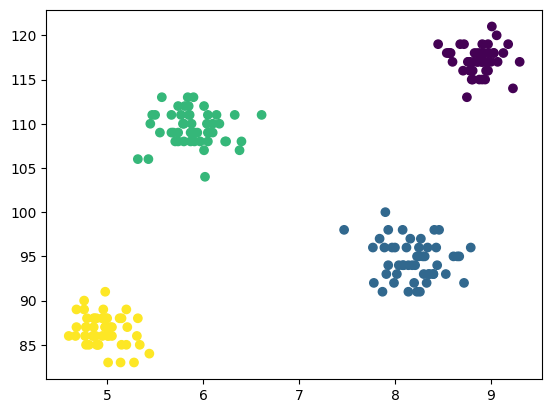

In [9]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['label'])

# K-Means on 3D Data

In [12]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [13]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=y, opacity=0.7)
fig.show()

In [14]:
wcss = []

for i in range(1,21):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [15]:
wcss

[11143.784324503365,
 4122.40955760353,
 2552.391733407689,
 593.2516262404542,
 544.0909257443524,
 504.92574626597946,
 483.19612918637245,
 458.0536653617714,
 411.6826673671517,
 394.35241324589555,
 370.28425815548195,
 332.284324579726,
 315.39412554044173,
 302.9426825039438,
 298.45581025832485,
 266.18274094782623,
 276.54015042454927,
 259.34405065794294,
 234.35303547300202,
 221.43867970572697]

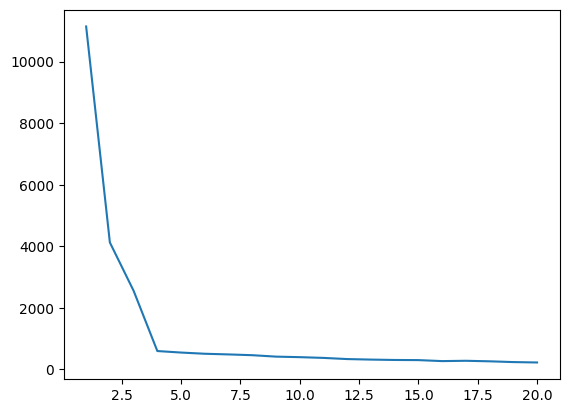

In [16]:
plt.plot(range(1,21), wcss)

In [17]:
km = KMeans(n_clusters=4)
km.fit(X)

y_means = km.predict(X)

In [18]:
y_means

array([0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 3, 3, 3, 3, 1, 3,
       2, 1, 1, 0, 2, 3, 0, 2, 3, 0, 0, 1, 2, 0, 1, 2, 3, 3, 1, 2, 1, 0,
       2, 3, 3, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 3, 0, 1, 2, 2, 2, 3, 1,
       3, 0, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 1, 3, 2, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 2, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 3, 3, 2,
       3, 0, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 3, 2, 1, 3, 0, 3, 1, 3, 1,
       2, 1, 0, 3, 3, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 3, 3,
       0, 3, 1, 2, 3, 0, 0, 1, 1, 3, 3, 1, 1, 3, 3, 1, 0, 1, 0, 3, 0, 0,
       2, 3, 3, 1, 2, 2, 3, 3, 3, 1, 2, 1, 0, 0, 2, 2, 0, 3, 3, 0, 2, 1,
       3, 2], dtype=int32)

In [19]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_means

In [20]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3', color='label')
fig.show()